In [26]:
#importing packages we need (pandas, matplitlib, and numpy)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [27]:
#assigns the data from gaia to a variable
df = pd.read_csv("25_Pc_Full_Query-result.csv")

In [28]:
#making lists for G, J, and distance (which we need for our CMD) from our dataframe using indexing
G = df["phot_g_mean_mag"]
J = df["j_m"]
distance = 1 / (df["parallax"]/ 1000)

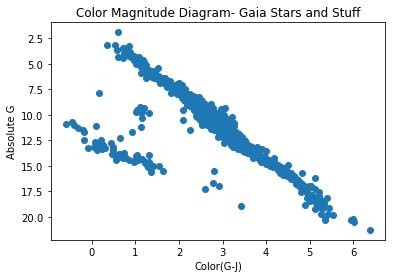

In [29]:
#defines the absolute magnitude using the formula(list)
abs_mag = G - 5 * np.log10(distance) + 5

#defines cm as our color map
#cm = plt.cm.get_cmap("RdYlBu_r")

#creates a scatter plot using G-J as the x values and the absolute magnitude as the y values
plt.scatter(G-J,abs_mag)

#adds a title and labels to our axes
plt.title("Color Magnitude Diagram- Gaia Stars and Stuff")
plt.xlabel("Color(G-J)")
plt.ylabel("Absolute G")

# inverts the y axis
plt.gca().invert_yaxis()

#shows our plot
plt.show()

In [30]:
df.columns[-100:]

Index(['phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_rp_n_obs',
       'phot_rp_mean_flux', 'phot_rp_mean_flux_error',
       'phot_rp_mean_flux_over_error', 'phot_rp_mean_mag',
       'phot_bp_rp_excess_factor', 'phot_proc_mode', 'bp_rp', 'bp_g', 'g_rp',
       'radial_velocity', 'radial_velocity_error', 'rv_nb_transits',
       'rv_template_teff', 'rv_template_logg', 'rv_template_fe_h',
       'phot_variable_flag', 'l', 'b', 'ecl_lon', 'ecl_lat', 'priam_flags',
       'teff_val', 'teff_percentile_lower', 'teff_percentile_upper', 'a_g_val',
       'a_g_percentile_lower', 'a_g_percentile_upper', 'e_bp_min_rp_val',
       'e_bp_min_rp_percentile_lower', 'e_bp_min_rp_percentile_upper',
       'flame_flags', 'radius_val', 'radius_percentile_lower',
       'radius_percentile_upper', 'lum_val', 'lum_percentile_lower',
       'lum_percentile_upper', 'datalink_url', 'epoch_photometry_url',
       'source_id.1', 'original_ext_s

In [31]:
i = df["i_mag"]
print(max(G-i))
print(min(G-i))


3.982372
-19.2156887


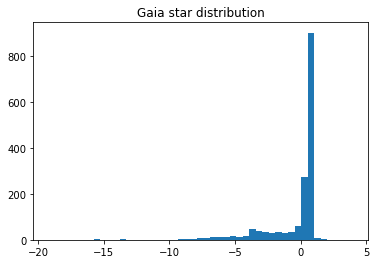

In [32]:
list1 = G - i
plt.hist(list1, bins = 47)
plt.title("Gaia star distribution")
plt.show()

/Users/lradtke/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Courier New Bold'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lradtke/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


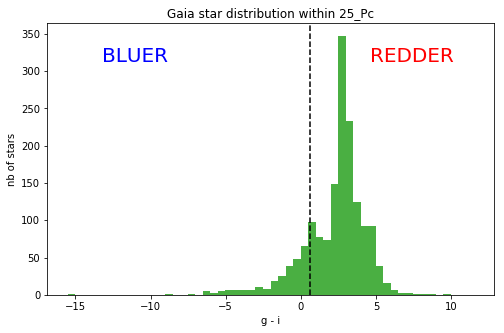

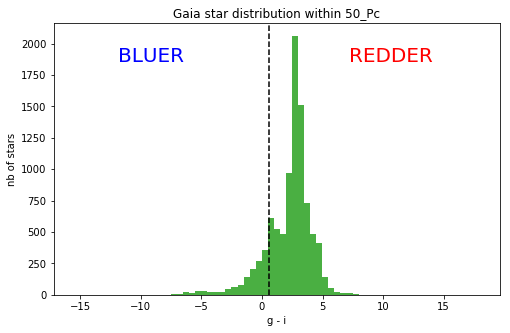

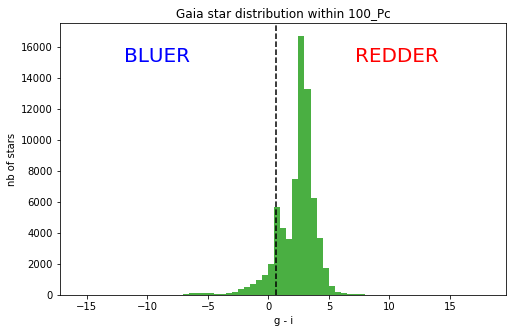

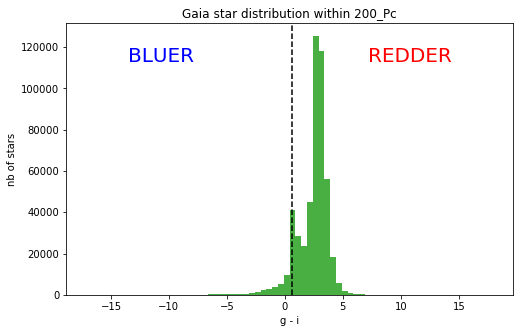

In [33]:
gsfont = {'fontname':'Courier New Bold'}
def histogram(fileName,name):
    file = pd.read_csv(fileName)
    g = file["g_mag"]
    i = file["i_mag"]
    
    list1 = g - i
    mask = np.isfinite(list1)
    cleaned_list = list1[mask]
    
    plt.figure(figsize = [8,5])
    
    y, x, _ = plt.hist(cleaned_list, bins = np.arange(min(cleaned_list), 
            max(cleaned_list), 0.5), color = "#4aaf42")
    plt.axvline(x=0.6, color = "black", linestyle = 'dashed')
    plt.text(max(x)- 0.6 * max(x), max(y) - 0.1 * max(y),
             "REDDER", color = "r", size = 20, **gsfont)
    plt.text(min(x)+ 0.2* max(x), max(y) - 0.1 * max(y),
             "BLUER", color = "b", size = 20, **gsfont)
    plt.xlabel("g - i")
    plt.ylabel("nb of stars")
    plt.title("Gaia star distribution within {}".format(name))
    
    plt.savefig("hist_{}.png".format(name))
    

histogram("25_Pc_Query-result.csv","25_Pc")
histogram("50_Pc_Query-result.csv","50_Pc")
histogram("100_Pc_Query-result.csv","100_Pc")
histogram("200_Pc_Query-result.csv","200_Pc")
